# SBER Bank - Exploratory Analysis Notebook

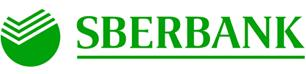

## Goal 1: Prediction of Individual Property Values 

> __ABSTRACT__ 
The housing market in Russia is relatively stable, and contrary to mainstream knowledge on real estate, the value of a property is determined my more factors than the typical square area, number of floors/bathrooms and bedrooms. This report extends this belief to other factors using up to the available 291 explanatory variables to develop a set of advanced regression models that would best predict the price of an individual property in the Russia area. In collaboration with SBERBANK, enable buyers and sellers to make the most effective decisions during real estate business decisions. 

The project is related to the SMU MSDS 6372 Project 1 on SBER Bank dataset

### Objective
Utilizing the provided `modleingData` _(train)_ and `projectionData` _(test)_, provide 3 candidate models that best predicts the individual property values `price_doc` _(response/target variable)_. One of the core metrics used to determine the best model is the model that minimized the __Root Mean Squared Logarithmic Error__ (RMSLE)


### Contents
This notebook primarly focuses on the data analysis and feature selection in preparation for statistical modeling:
1. Data Collection
2. Preprocessing and Data Cleaning
3. Exploratory Analysis _(correlation, VIF)_

In [1]:
!dir data

 Volume in drive C is OSDisk
 Volume Serial Number is DC78-EAF9

 Directory of C:\Users\phhale\OneDrive - Southern Methodist University\MSDS 6372 Applied Statistics\Project 1\data

06/10/2019  04:25 PM    <DIR>          .
06/10/2019  04:25 PM    <DIR>          ..
06/01/2019  09:03 AM    <DIR>          .ipynb_checkpoints
06/10/2019  04:25 PM             2,556 goal2_data.csv
06/10/2019  12:42 AM         9,542,590 lasso_result (3).csv
06/09/2019  11:34 PM           384,307 lasso_result.csv
05/20/2019  06:22 PM            88,213 sample_submission.csv
               4 File(s)     10,017,666 bytes
               3 Dir(s)  20,527,210,496 bytes free


In [2]:
%%html
<div id="data"><p><iframe src="./data_dictionary.txt" frameborder="2" height="300"width="97%"></iframe></p></div>

__Import Libraries and required data sets__

In [3]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import plotting libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# style
%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200, 'display.float_format', lambda x: '%.3f' % x)
sns.set(style='white', context='notebook', palette='deep')

We use `pandas` to read the `modelingData.csv` (train data) and the `projectionData.csv` (test data). We will first use the `train` dataset for analysis and modeling and then use `test` to make predictions. 

In [4]:
train = pd.read_csv("./modelingData.csv")
test = pd.read_csv("./projectionData.csv")
train['flag'] = 'train'
test['flag'] = 'test'
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,...,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,flag
0,1,8/20/2011,43,27.000,4.000,nan,nan,nan,nan,nan,nan,Investment,Bibirevo,6407578.100,155572,0.190,0.000,9576,5001.000,5,10309,11065.000,5,0,240.000,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.000,25.000,

In [5]:
print("Train data: ")
print("Training data Observations (rows): ", train.shape[0])
print("Training data Factors (columns): ", train.shape[1])
print("----------------------------------------------------")
print("Test data: ")
print("Test data Observations (rows): ", test.shape[0])
print("Test data Factors (columns): ", test.shape[1])

Train data: 
Training data Observations (rows):  25471
Training data Factors (columns):  293
----------------------------------------------------
Test data: 
Test data Observations (rows):  5000
Test data Factors (columns):  292


We can see from the above output that the `train` dataset has one additional column than the `test` dataset, which is appropriately due to the fact the `train` dataset has `price_doc` which is the final property price that it is our objective to predict. 

### Preliminary Summary Statistics and Data Analysis
In regards to the training below are some summary statistics

In [6]:
print("SBERBANK Preliminary Summary Statistics (training dataset)")
print("Number of properties: ", len(train))
print("Mean Property Price: ", str("$"), round(train.price_doc.mean(),0))
print("Highest Property Price: ", str("$"),train.price_doc.max())
print("Lowest Property Price: ", str("$"),train.price_doc.min())
print("Variability Property Price (standard dev): ", str("$"),round(train.price_doc.std(),0))

highest_area = train.groupby(['sub_area']).price_doc.mean().nlargest(1)
smallest_area = train.groupby(['sub_area']).price_doc.mean().nsmallest(1)
print(" ")
print("On Average, %s is the HIGHEST Property Sub Area with $ %d " % (highest_area.index[0], highest_area.values[0]))
print("On Average, %s is the LOWEST Property Sub Area with $ %d " % (smallest_area.index[0], smallest_area.values[0]))
print("Property transaction between 2011 and 2015 that we are assessing.")

SBERBANK Preliminary Summary Statistics (training dataset)
Number of properties:  25471
Mean Property Price:  $ 7127058.0
Highest Property Price:  $ 111111112
Lowest Property Price:  $ 190000
Variability Property Price (standard dev):  $ 4828460.0
 
On Average, Hamovniki is the HIGHEST Property Sub Area with $ 21025307 
On Average, Poselenie Klenovskoe is the LOWEST Property Sub Area with $ 1000000 


### Review of Normality 
Next we plot 2 histograms for `price_doc` to get a better understanding of the current distribution. The historgram on the left is of `price_doc` and on the right is `price_doc` with a log transformation. 

Skewness of the 'price_doc':       4.687
Skewness of the 'log(price_doc)':  -0.667


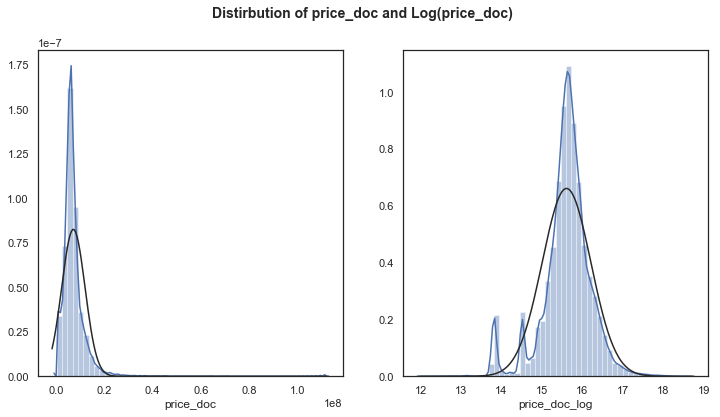

In [7]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
plt.suptitle('Distirbution of price_doc and Log(price_doc)', fontsize=14, fontweight='bold')

sns.distplot(train.price_doc, fit=norm, ax=ax[0], )

#sns.distplot(np.log(train.price_doc), fit=norm, ax=ax[1])
train['price_doc_log'] = np.log(train.price_doc)
sns.distplot(train.price_doc_log, fit=norm, ax=ax[1])
fig.show()

#check on the skew and kurtosis
print("Skewness of the 'price_doc':      ", round(train.price_doc.skew(), 3))
#print("Kurtosis: ", round(train.price_doc.kurt(), 3))
print("Skewness of the 'log(price_doc)': ", round(np.log(train.price_doc).skew(), 3))

The left plot when `price_doc` is subject to no transformation we see a __long tail right distribution__. This is also supported by the `skewness` statistic of 4.687 which is > 0 indicatng a __highly positive skewness__.  

Train has one column more than test because of the __target value: `price_doc`__ we will combin in cleaning and then separate back out for model selection. 

#### Kolmogorov-Smirnov Test

To suppliment the analysis of normality, we can use the __Kolmogorov-Smirnov Test__ to calculate whether the `price_doc` comes from a _normal distirbution_. The Kolmogorov-Smirnov test is best used for large sample size, in which our hypothesis test is as follows:
* $H_0 =$ p-value > 0.05
* $H_A =$ p-alue < 0.05 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

In [8]:
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

# normality test using the Shapiro Test
stat, p = stats.kstest(train.price_doc,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

interpret(p)

Statistics=1.000, p=0.000
Different distribution (reject H0)


```sas
** NORMALITY TEST;
title "Test for Normality for train dataset";   
proc univariate data = train normal;
var price_doc;
run;
```
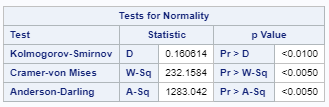

We can interpret the following p-value that we reject the $H_0$, given p-value is less than 0.05 our significance level, concluding `price_doc` is not a normal distribution and we can look to perform other transformations. Hense supporting our inital assumption of a log transformation. 

#### QQ Plot Normality Check

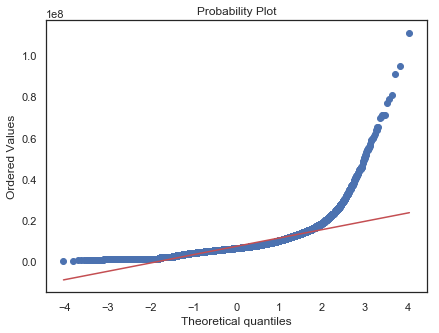

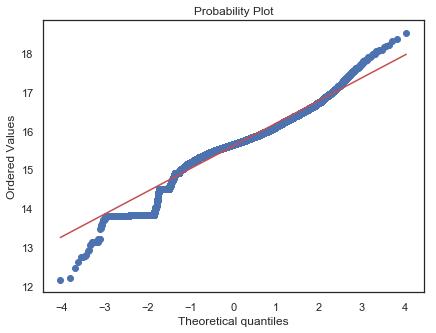

In [9]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('QQ plot price_doc')
stats.probplot(train.price_doc, plot=plt, dist="norm")
plt.show()

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.title('QQ plot log price_doc')
#stats.probplot(np.log(train.price_doc), plot=plt, dist="norm")
stats.probplot(train.price_doc_log, plot=plt, dist="norm")
plt.show()

Normality review also shows a strong positive skew in `price_doc` that could be a canidate for transformation. 

---
## Cleaning
Combine both train and test data set for data cleaning. 

In [24]:
## combine into one df for cleaning
df = pd.concat((train.loc[:, ~train.columns.isin(['price_doc', 'price_doc_log'])], test), axis = 0, ignore_index=True)
df['price_doc'] = train.price_doc
df['price_doc_log'] = np.log(train.price_doc)

print("Combined data: ")
print("Combined data Observations (rows): ", df.shape[0])
print("Combined data Factors (columns): ", df.shape[1])

Combined data: 
Combined data Observations (rows):  30471
Combined data Factors (columns):  294


__Rename long column names for SAS__

We will be doing some modeling in `SAS` but `SAS` is very specific on the column characters. Therefore we've developed a custom listing for the columns. 

In [25]:
from utils import sas_col_rename
df.rename(columns=sas_col_rename, inplace=True)

#### Russina Districts

![](https://www.globalsecurity.org/military/world/russia/images/map-regions.gif)


Curring the `sub_area` naming of the districts in Russia contains too many variations that will added to the complexity of our modeling. Therefore, we searched the web and reclassified all of the russian districts by their district location:

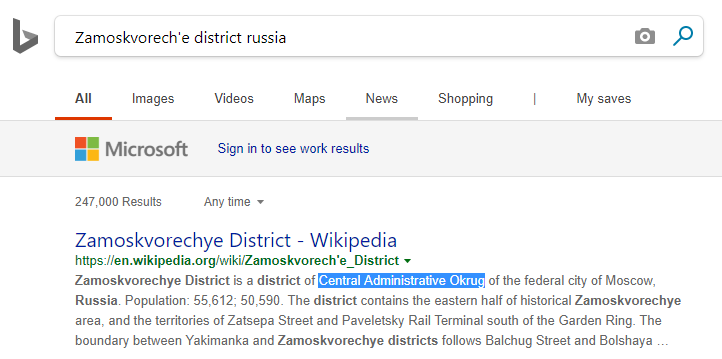


__Note__ All of the Russian districts were search able for the exception of the `Poselenie*` districts. These districts either are indicated as a different spelling or are not seachable on american-english based search engines, therefore they were classified in to their own class

In [26]:
from utils import districts
#list(df.sub_area.unique())
df['districts']= df.sub_area.map(districts)
print("Russian District Names ")
df.districts.unique()

Russian District Names 


array(['north_east', 'south', 'south_east', 'north_west', 'central',
       'east', 'north', 'west', 'south_west', 'Poselenie'], dtype=object)

In [27]:
def category_view(variable):
    fig = plt.figure()   
    fig = sns.countplot(variable);
    print(variable.describe())
    print(variable.unique())
    print("number of categories: ", len(variable.unique()))

count         30471
unique           10
top       Poselenie
freq           6527
Name: districts, dtype: object
['north_east' 'south' 'south_east' 'north_west' 'central' 'east' 'north'
 'west' 'south_west' 'Poselenie']
number of categories:  10


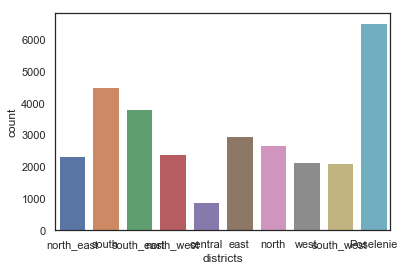

In [28]:
category_view(df.districts)

While all of the `Poseleine*` were classified together as they appeared not to have a searchable Russian district, all other districts appear to have roughly eaven amount for the execption of the central district. 

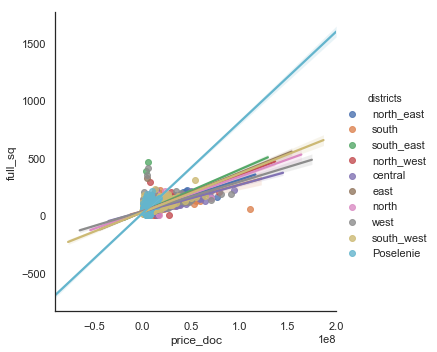

In [32]:
sns.lmplot(y ='full_sq', x = 'price_doc', data = df[df.full_sq<500], hue = 'districts')

There appears to be some interaction with `districts`

count          30471
unique             2
top       Investment
freq           19448
Name: product_type, dtype: object
['Investment' 'OwnerOccupier']
number of categories:  2


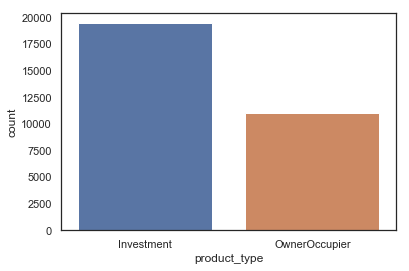

In [208]:
category_view(df.product_type);

For `product type` there appears to only be 2 unique values `Investment` and `OwnerOccupier`. This is a great candidate for one-hot encoding transformation wheere we turn this data into a boolean (0/1) dummy variable column. To do this we will utilize `pandas` `get_dummies()` function. 

__State Variable__

There appears to be an outlier with `state` at 33. we can infer that is is a miss key for `3`

count   16912.000
mean        2.107
std         0.880
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        33.000
Name: state, dtype: float64
[nan  3.  1.  2.  4. 33.]
number of categories:  6


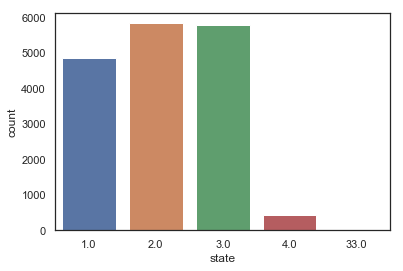

In [33]:
category_view(df.state);

In [34]:
#train.loc[train.state == 33.0, 'state'] = 3
df.loc[df.state == 33.0, 'state'] = 3

In [36]:
state_piv = df.pivot_table(values = 'price_doc', index = 'state', 
                               aggfunc = np.median)
state_piv

,price_doc
state,
1.000,6183691.000
2.000,6650000.000
3.000,7300000.000
4.000,9925000.000


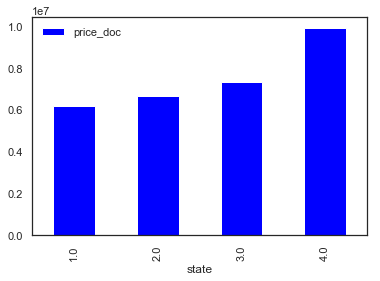

In [37]:
state_piv.plot(kind='bar', color='blue')


We can see that `median price` increases as the `state` increases. 

### Data/Time Formats
reformated initial datetime in excel before starting this notebook.

In [124]:
from datetime import datetime as dt
df['timestamp'] = pd.to_datetime(df.timestamp)

df['day'] = df.timestamp.dt.day
df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

#https://stackoverflow.com/questions/51095085/how-to-merge-month-and-year-columns-to-get-single-mm-yyyy-column
df['MonthYear'] = pd.to_datetime(df.assign(Day=1)[['year','month','day']].rename(columns=str.lower)).dt.strftime('%Y%m')

In [125]:
from datetime import datetime as dt
ts = train.copy()
ts['timestamp'] = pd.to_datetime(ts.timestamp)

ts['day'] = ts.timestamp.dt.day
ts['month'] = ts.timestamp.dt.month
ts['year'] = ts.timestamp.dt.year
ts['MonthYear'] = pd.to_datetime(ts.assign(Day=1)[['year','month','day']].rename(columns=str.lower)).dt.strftime('%Y%m')

In [126]:
#ts = df[['id', 'month', 'year', 'MonthYear', 'price_doc']]
#ts['month'] = ts['month'].astype('category')
ts_ = ts.groupby(['year','MonthYear'])['price_doc'].mean().reset_index()
ts_['months_'] = ts_.index + 1
ts_.head(10)


,year,MonthYear,price_doc,months_
0,2011,201108,5850000.000,1
1,2011,201109,6255310.057,2
2,2011,201110,5667466.103,3
3,2011,201111,6140269.116,4
4,2011,201112,5812806.357,5
5,2012,201201,6967014.896,6
6,2012,201202,6815771.139,7
7,2012,201203,6789860.019,8
8,2012,201204,6720821.319,9
9,2012,201205,7393948.929,10


__Plot the time series of the price_doc versus the numbers 1 – 47 on the x-axis.  You should simply name the x-axis “months”.__

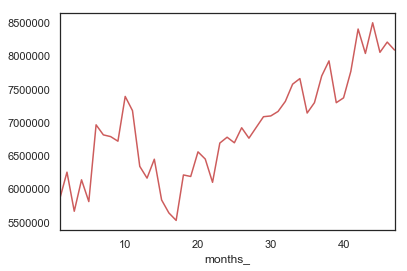

In [127]:
sns.tsplot(ts_.price_doc, time = ts_.months_, color="indianred");

__Lag-1 Price__
below is a created column of `price_lag1` variable to consider a scatterplot of price vs lag1 variable. 

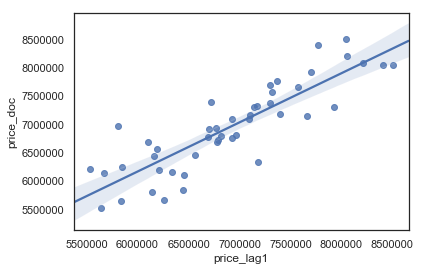

In [128]:
ts_['price_lag1'] = ts_.price_doc.shift(1)
sns.regplot(x = ts_.price_lag1, y=ts_.price_doc)

ts_.to_csv("./data/goal2_data.csv")

Notice the non-random trend suggesting autocorrelated errors in the scatter plot

__OLS__

In [129]:
ts_model = smf.ols(formula='price_doc~ months_', data = ts_).fit()
print(ts_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     85.75
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           5.46e-12
Time:                        21:22:53   Log-Likelihood:                -678.67
No. Observations:                  47   AIC:                             1361.
Df Residuals:                      45   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.825e+06   1.37e+05     42.560      0.0

Below is 

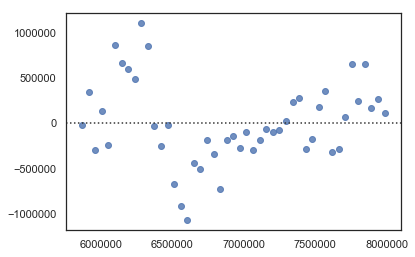

In [130]:
sns.residplot(x = ts_model.fittedvalues, y = ts_model.resid);

### Property Size Analysis (Outliers and Influential Points)

There are several key indicators typically highly correlated (and proven in the correlation section in feature design - later section). The highly corelated features of interested include size measurements of the property, specifically `full_sq` and `life_sq`.

Starting off, summary statistics indicate `full_sq` and `life_sq` there are extremely `MAX` observations. 

In [144]:
df[['full_sq', 'life_sq']][:train.shape[0]].describe()

,full_sq,life_sq
count,25471.000,20138.000
mean,54.200,34.020
std,40.427,20.968
min,0.000,0.000
25%,38.000,20.000
50%,49.000,30.000
75%,63.000,43.000
max,5326.000,802.000


lets checkpoint this dataset and run a quick script in sas to assess __leverage__ and __influence__

In [145]:
df[['full_sq', 'life_sq', 'price_doc']][:train.shape[0]].to_csv("full_sq_outlier_sas.csv")

In [151]:
reg = smf.ols('price_doc ~ full_sq + life_sq', data = df)

res = reg.fit() # use fit() to initiate the modelling process
print(res.summary())  # detailed results from the ols model

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2451.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:10:24   Log-Likelihood:            -3.3686e+05
No. Observations:               20138   AIC:                         6.737e+05
Df Residuals:                   20135   BIC:                         6.737e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.487e+06   6.34e+04     54.997      0.0

Using the regression model above and the sas code below we performed an analysis of the influential points the in the current multiregression model (note there are still some missing values)

```sas
title "Property SQ analysis";
ods graphics on;
proc reg data = sq  plots=all PLOTS(MAXPOINTS= 25471);
model price_doc = full_sq life_sq /partial  tol vif;
run;
ods graphics off;
```

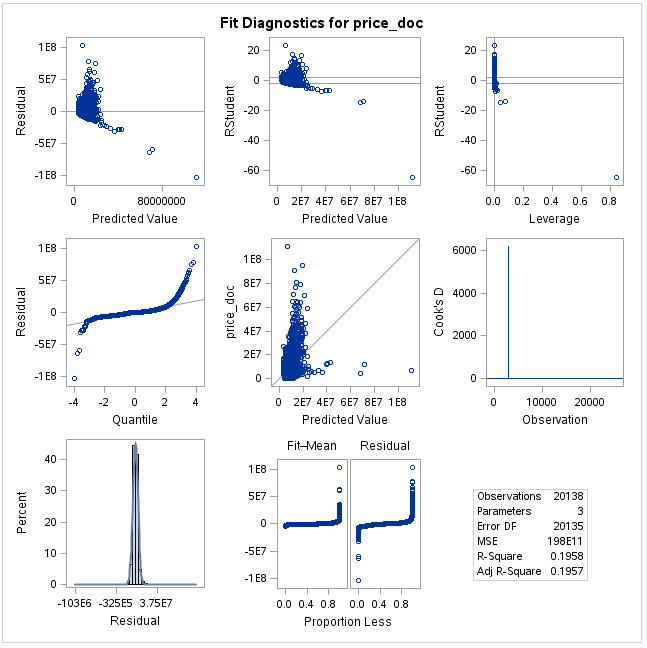

#### Notable Points for Leverage and Influence

__Leverage__
The top right plot is the __Studentized residual vs leverag__ plot in which the vericial line is the levarage statistic, that indicates anything greater than the levarage line are canidates for investigation. We can see one point that is significantly further from the other residuals that are realtivively closer to the leverage statistics, indicating that point has __high leverage__


below is the python plot for influential points were we can see that 

__Cooks D__
The plot on the right on the middle row is __Cook's D__ plot which plots all the observations based on the distance measure statistic. There appears to be one extremely large observation aroudn 6000, which is most likely `full_sq` max observation of 5326. This will be an outlier that we delete or change. 


__Normality__
Reviewing the QQ plot there appears to be some departures from normality as there seems to be some variation with the high values of the residuals. 


#### Property Size Anlaysis Final Outcomes
After further investigation on the influence and leverage statistics on `full_sq` and `life_sq` below are the notable changes:
* Change `id: 3530` `full_sq: 5326` appears an outlier but really an input error, we believe this apt appars to be on the same floor as `id: 4184` given all the similar neighbourhood features. Therefore, `id: 3530` will be updated to `full_sq: 52`
* Remove `id: 13549` as the `life_sq: 7478` is an outlier, but after futher anysis appeared to be missed keyed. We changed this to a `NaN` value which was then made to be a canidate for median imputation

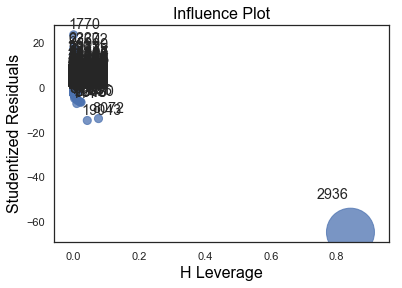

In [152]:
# object for the analysis of influential points
sm.graphics.influence_plot(res);

In [159]:
# updated features
df.loc[df.id==3530, "full_sq"] = 52
df.loc[df.id==13549, "life_sq"] = np.nan

In [160]:
# another snapshot for SAS analaysis
df[['full_sq', 'life_sq', 'price_doc']][:train.shape[0]].to_csv("full_sq_outlier_sas2.csv")

Additionally, below is the test for __multicolinarity__, which was also an output from the sas code above. 

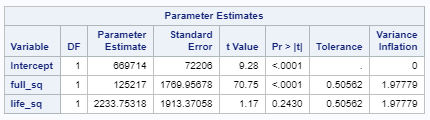


interestingly `full_sq` and `life_sq` are not significantly multicolinear. 

__Partial Residual Plots__
Likewise, acknowledging that these predictor variable are not highly correlated, we then utilized the __Partial Residual Plots__ to assit with how well the residuals fit in the model. While this is not the final models, can have some confidence that these two predictor variables are candidates predictor variables as it its clear that `full_sq` variables have significant relationship with the `price`

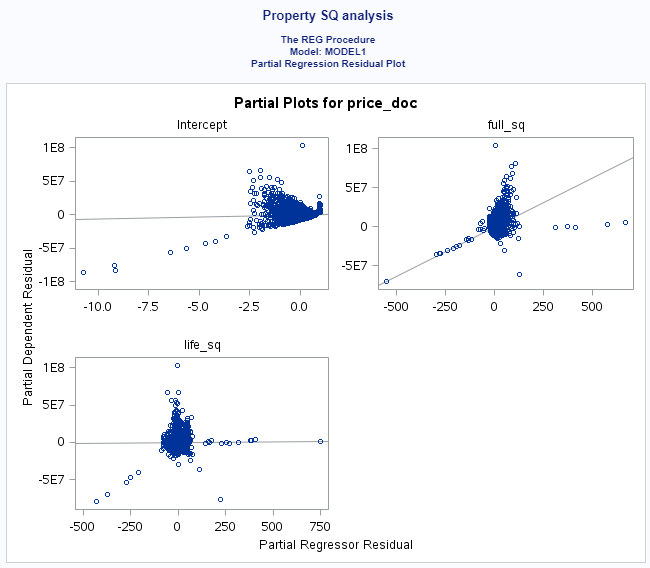

In [162]:
df[['full_sq', 'life_sq']].describe()

,full_sq,life_sq
count,30471.000,24087.000
mean,54.041,34.094
std,23.114,20.819
min,0.000,0.000
25%,38.000,20.000
50%,49.000,30.000
75%,63.000,43.000
max,729.000,802.000


In [169]:
54.041 * 3

162.123

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     5066.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:40   Log-Likelihood:            -3.3495e+05
No. Observations:               20138   AIC:                         6.699e+05
Df Residuals:                   20135   BIC:                         6.699e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.697e+05   7.22e+04      9.275      0.0

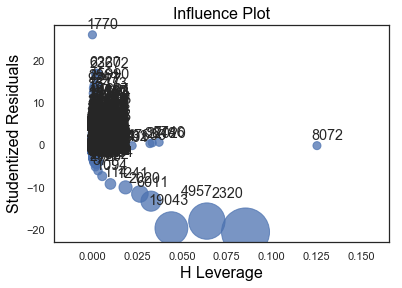

In [166]:
reg = smf.ols('price_doc ~ full_sq + life_sq', data = df)

res = reg.fit() # use fit() to initiate the modelling process
print(res.summary())  # detailed results from the ols model

# object for the analysis of influential points
sm.graphics.influence_plot(res);

There still appears to be some influence. We again take a look at SAS

In [187]:
df1 = df[['id','full_sq', 'life_sq', 'price_doc']][:train.shape[0]].dropna()
df1.head()

,id,full_sq,life_sq,price_doc
0,1,43,27.000,5850000.000
1,2,34,19.000,6000000.000
2,3,43,29.000,5700000.000
3,4,89,50.000,13100000.000
4,5,77,77.000,16331452.000


In [191]:
influencial_index_list =df1.index[atyp_levier]

In [193]:
df1[df1.index.isin(influencial_index_list )]

,id,full_sq,life_sq,price_doc
114,129,325,325.000,5000000.000
158,179,98,94.000,11500000.000
241,279,144,68.000,5817420.000
243,281,83,83.000,11380040.000
258,298,154,101.000,23300000.000
380,442,129,80.000,25500000.000
516,607,126,86.000,13400000.000
615,732,97,95.000,9200000.000
685,811,136,89.000,2060000.000
736,872,83,83.000,10726400.000


#### Cooks D Rule of Thumb
Cook's Distance measurement provide a statistical view of the __overall influencE__ residuals have on the estimated residual coefficient. 
$D_i=\frac{(y_i-\hat{y}_i)^2}{p \times MSE}\left[ \frac{h_{ii}}{(1-h_{ii})^2}\right]$

per statistical sleuth: _"Some statisticians use a rough guideline that a value of $D_i$ close to or larger than 1 indicates a_ __large incluence__. 

We therefore reported a set of influential statistical and focused mainly on cooks D for assistance on observations that could have undue impacts on the regression. Therefore, below are our influential observations. 

In [205]:
#Other criteria for detecting influential points
df_inf =pd.DataFrame(influence_.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))
df_inf[(df_inf.cooks_d>1)]

,hat_diag,student_resid,dffits,cooks_d
2020,0.027,-11.600,-1.917,1.216
2320,0.086,-20.568,-6.291,12.920
4957,0.064,-18.001,-4.706,7.265
6011,0.033,-13.296,-2.447,1.979
19043,0.044,-19.674,-4.228,5.847


In [200]:
df1[df1.index == 19043]

,id,full_sq,life_sq,price_doc
19043,22788,637,637.000,4725142.000


In [225]:
influence_index = []
influence_index.append(list(df_inf[(df_inf.cooks_d>1)].index))

Additionally, reviewing the __studentized residual__, per our test book, statistical sleuth, it describes the __studnetied residual__ as:

$studres_i = \frac{res_i}{\hat\sigma \sqrt{1-h_i}}$

where all the residuals are put on a common scale: the numbers of standard deviations. Since, roughly 95% of normally distributed values fall within 2 standard deviations of their mean, it is common to inveistgate obervations whose studentized residuals are smallers than -2 or larger than 2. Since this data set is quite large, we decided to increase the range to +/- 5 student_resid and define the following list as highly influential. 

In [211]:
df_inf[(df_inf.student_resid>5) | (df_inf.student_resid<-5)]['student_resid'].sort_values(ascending=False).head()

1770    25.988
6220    16.705
23672   16.582
15990   14.133
2961    14.026
Name: student_resid, dtype: float64

In [252]:
influence_index = []
influence_index.append(list(df_inf[(df_inf.cooks_d>1)|(df_inf.student_resid>5) | (df_inf.student_resid<-5)].index))
df=df[~df.id.isin(list(df1[df1.index.isin(influence_index[0])].id))]

In [251]:
# another snapshot for SAS analaysis
df[df.flag=='train'][['full_sq', 'life_sq', 'price_doc']].to_csv("full_sq_outlier_sas3.csv")

## Data Quality Checks & Null Values
we have a lot of column names, with im sure plenty of missing or incorrectly formatted values. 


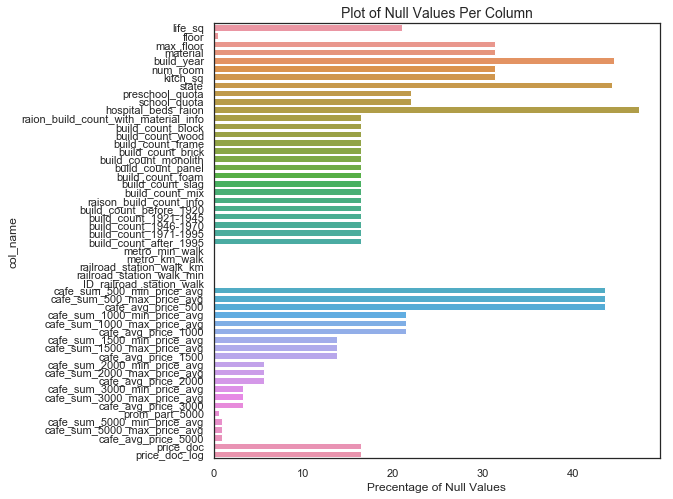

In [253]:
# set null values dataframe
null_values = df.isnull().sum().reset_index()
null_values.columns = ["col_name", 'null_count']
null_values = null_values[null_values.null_count > 0]

# get the percentage
null_values['perc']=null_values['null_count'] / 30471 * 100

# plot counts in a bar plot
plt.figure(figsize=(8,8))
ax = sns.barplot(y='col_name', x='perc', data = null_values)
ax.set_xlabel("Precentage of Null Values", fontsize = 12)
ax.set_title("Plot of Null Values Per Column", fontsize = 14)
plt.show()

##### Mediuam Imputation 
Create function to fill in missing values by grouping similar groups and taking the mediaum of the targeted column. 

In [255]:
def median_impute(data):
    return data.fillna(data.median())

In [256]:
# compute the nearest 10s for full_sq for life_sq imputations for NAs
df['full_sq10'] = (df.full_sq // 10) * 10

In [257]:
# group by sub area and the nears10s full sq
by_area_sq = df.groupby(['sub_area', 'full_sq10'])
by_area = df.groupby(['sub_area'])
by_sq = df.groupby(['full_sq10'])
df.life_sq = by_area_sq.life_sq.transform(median_impute)
df.life_sq = by_area.life_sq.transform(median_impute)
df.life_sq = by_sq.life_sq.transform(median_impute)

In [258]:
df.life_sq.isnull().sum()

0

__Median imputation on metro and railroad NA__

In [259]:
# imputation on mean for metro walk and km
df[df.metro_km_walk.isnull()].sub_area.unique()
df[df.metro_km_walk.isnull()].ID_metro.unique()

array([105, 158, 140,  21,  92,  88], dtype=int64)

In [260]:
by_area_metro = df.groupby(['sub_area', 'ID_metro'])
df.metro_km_walk = by_area_metro.metro_km_walk.transform(median_impute)
df.metro_min_walk = by_area_metro.metro_min_walk.transform(median_impute)
df.metro_km_walk.isnull().sum() + df.metro_min_walk.isnull().sum()

0

__Cafe Count - Median Impute__

In [261]:
# [col for col in df if col.startswith('cafe_')]
cafe_count_key = ['cafe_count_500','cafe_count_1000', 'cafe_count_1500', 
                  'cafe_count_2000', 'cafe_count_3000','cafe_count_5000']

for cafe_count_key_i in cafe_count_key:
    by_area = df.groupby(['sub_area', cafe_count_key_i])
    
    # list comprehension to create columns that are similar for median impute
    cols_= [col for col in df if col.startswith(cafe_count_key_i +"_")]
    
    for col_var in cols_:
        df[col_var] = by_area[col_var].transform(median_impute)
        

Remaining features that have `NA` values... we will still include them in the correlation analysis in case we need to make some correection, but from the look of it, we will already have multicolinarity assessments to perform. 

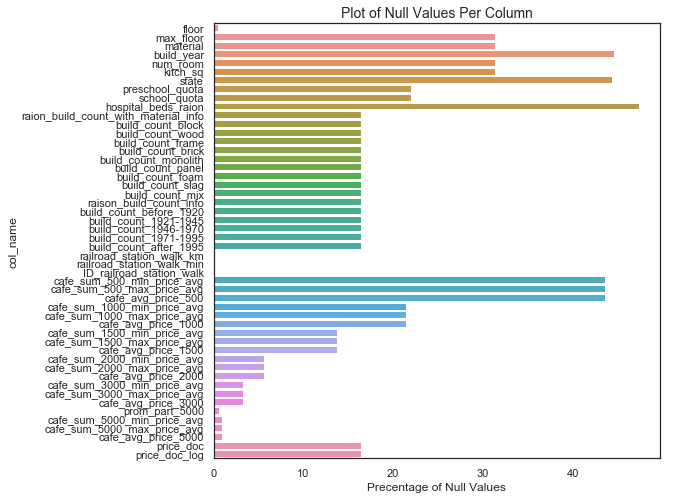

In [263]:
# set null values dataframe
null_values = df.isnull().sum().reset_index()
null_values.columns = ["col_name", 'null_count']
null_values = null_values[null_values.null_count > 0]

# get the percentage
null_values['perc']=null_values['null_count'] / 30471 * 100

# plot counts in a bar plot
plt.figure(figsize=(8,8))
ax = sns.barplot(y='col_name', x='perc', data = null_values)
ax.set_xlabel("Precentage of Null Values", fontsize = 12)
ax.set_title("Plot of Null Values Per Column", fontsize = 14)
plt.show()

#### VARIABLES EDA DECISONS

* Removing `floor`, `max_floor`, `materials`, `build_year`, `num_rooms`,`state` as there is not enough information for imputation. even with a multiple linear regression, for potential predictions, the results accuracy would need to at least by reviewed by someone from SBER Bank. 
* __`kitch_sq`__ dropped - inaccuracys such as - `ID: 8059` where `full_sq` and `life_sq` = 11 but `kitch_sq` = 12

In [264]:
df[df.id == 8059][['id', 'timestamp','full_sq', 'life_sq', 'kitch_sq']]

,id,timestamp,full_sq,life_sq,kitch_sq
6720,8059,2013-05-21,11,11.000,12.000


### Checkpoing for modeling

In [265]:
df.to_csv("df_eda.csv")